In [158]:
import sys
import math
del sys.modules['feature']
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import feature as ft
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
del sys.modules['pipeline']
from pipeline import feat
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where

In [83]:
#df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")
#df = pd.read_csv("Daten/Fiona_21.06.csv",sep=",")
df = pd.read_csv("Daten/Niklas_28.6.csv",sep=",")
#df['Gaze Y'] = df['Gaze Y'] * 0.75
#df['Gaze X'] = df['Gaze X'] * 0.75
df = df[(df['Timestamp'].between(202, 207) == True)].reset_index()
df['Gaze Y'] = df['Gaze Y'].fillna(0)
df['Gaze X'] = df['Gaze X'].fillna(0)
df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
df['Lost Track'] = df['Lost Track'].notna().astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)


# Generiert Geschwindigkeit
df_ges = ft.ges(df)
df = pd.concat([df,df_ges],axis=1)

### Filter
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
#df_new = df_new.loc[(df_new["dx"] >= 10) & (df_new["dx"] >= -10) == True]
#df_new = df_new.loc[(df_new["dy"] >= 20 * df_new["dx"]) & (df_new["dy"] > 0) == False]
#df_new = df_new.loc[(df_new["vx"] < -10) & (df_new["vx"] > 10) == False]
#df_new = df_new.loc[(df_new["vy"] <= 2500) & (df_new['vx'] >= 100) == True]
df = df[(df["Gaze Y"] <= 1030) == True].reset_index().drop(['level_0'], axis=1)
df['Fixation'] = ft.fix(df)
df = df.loc[(df['v'] == 0) & (df['Fixation'] == 0) == False].reset_index().drop(['level_0'], axis=1)
df

# Sakkaden
df_sacc = ft.sac(df)
df = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_sacc], axis=1, )

# Lost Track Dauer
df_ltt = ft.lost_t(df)
df  = pd.concat([df.reset_index().drop(["level_0"], axis=1), df_ltt], axis=1, )

df.drop(df.tail(1).index,inplace=True)
df

,index,Unnamed: 0,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation,Saccades,Saccade Duration,Lost Track Dauer
0,6421,6421,202.014748,1909,324,0,TrackingConfidence.HIGH,202014,-9.0,4.0,9.848858,-281.951062,125.311583,308.543991,-1.152572,1.0,0.0,0.0,0
1,6422,6422,202.046668,1900,328,0,TrackingConfidence.HIGH,202046,-329.0,145.0,359.535812,-10637.973558,4688.468589,11625.326625,-1.155678,1.0,0.0,0.0,0
2,6424,6424,202.108056,1571,473,0,TrackingConfidence.HIGH,202108,38.0,-23.0,44.418465,1209.017379,731.773677,1413.228833,1.026516,2.0,0.0,0.0,0
3,6425,6425,202.139486,1609,450,0,TrackingConfidence.HIGH,202139,310.0,-90.0,322.800248,10360.844974,3007.987250,10788.655888,1.288241,2.0,0.0,0.0,0
4,6426,6426,202.169406,1919,360,0,TrackingConfidence.HIGH,202169,0.0,-41.0,41.000000,0.000000,1343.582471,1343.582471,0.000000,0.0,1.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,6565,6565,206.544037,1067,988,0,TrackingConfidence.HIGH,206544,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.0,0.0,0.0,0
142,6566,6566,206.574476,1067,988,0,TrackingConfidence.HIGH,206574,11.0,-8.0,13.601471,344.619724,250.632526,426.121365,0.942000,11.0,0.0,0.0,0
143,6567,6567,206.606395,1078,980,0,TrackingConfidence.HIGH,206606,40.0,9.0,41.000000,1293.769597,291.098159,1326.113837,1.349482,11.0,0.0,0.0,0
144,6568,6568,206.637313,1118,989,0,TrackingConfidence.HIGH,206637,458.0,43.0,460.014130,14807.952331,1390.266267,14873.072733,1.477184,11.0,0.0,0.0,0


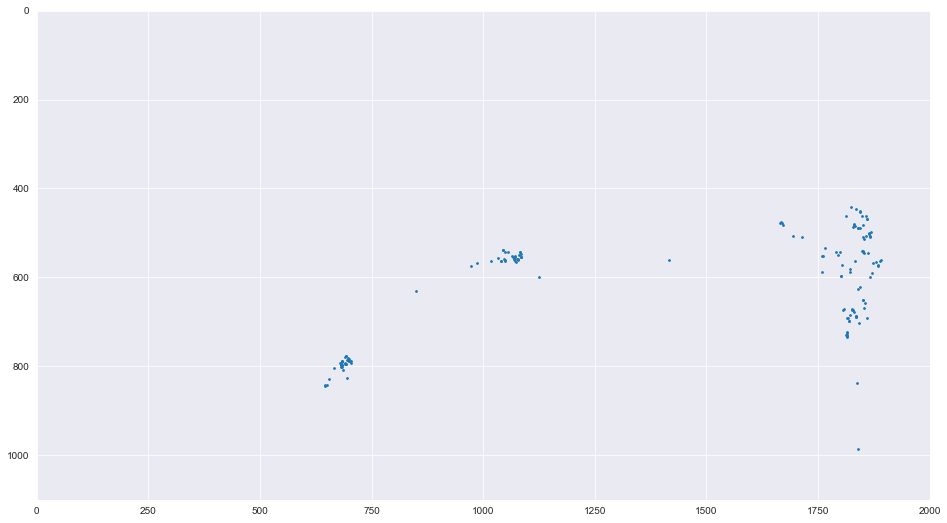

In [62]:
#df = df[(df['Timestamp'].between(30,40) == True)]
x = df["Gaze X"]
y = df["Gaze Y"]
#z = df2['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3)
plt.show()

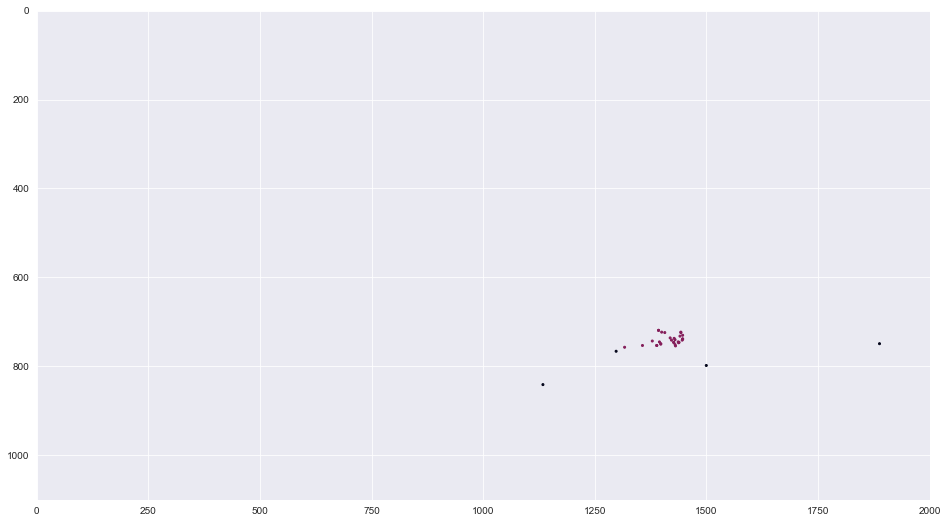

In [60]:
#df_filter = df_new[(df_new['Timestamp'].between(160,165) == True)]
#df_filter = df_filter[(df_new["Fixation"] == 0) == True]
x = df["Gaze X"]
y = df["Gaze Y"]
z = df['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 4, c=z)
plt.show()

In [224]:
df_final = pd.read_csv('feature.csv')
df_final.drop(['Unnamed: 0'], axis=1)

,Cliplänge in Sekunden,Anzahl Sakkaden,Gesamt Dauer Sakkaden,Anzahl Lost Tracks,Dauer Lost Tracks,Anzahl Fixationen,Gesamt Dauer Fixationen,Name
0,5.0,2.0,58.0,0.0,0.0,4.0,4.942,Vanessa_22.06.csv
1,5.0,5.0,187.0,0.0,0.0,7.0,4.813,Ole_20.06.csv
2,5.0,4.0,757.0,1.0,633.0,8.0,3.610,Merle_22.06.csv
3,5.0,28.0,1035.0,0.0,0.0,23.0,3.965,Nils_21.06.csv
4,5.0,6.0,185.0,0.0,0.0,6.0,4.815,Annika_20.06.csv
5,5.0,5.0,261.0,0.0,0.0,6.0,4.739,Robin_22.06.csv
6,5.0,7.0,217.0,0.0,0.0,8.0,4.783,Fiona_21.06.csv
7,5.0,12.0,1510.0,1.0,1087.0,10.0,2.403,Neele_20.06.csv
8,5.0,19.0,832.0,0.0,0.0,17.0,4.168,Jannis_16_06.csv


   Unnamed: 0  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0           0                    5.0             19.0                  832.0   
1           1                    5.0             12.0                 1510.0   
2           2                    5.0              7.0                  217.0   
3           3                    5.0              5.0                  261.0   
4           4                    5.0              6.0                  185.0   
5           5                    5.0             28.0                 1035.0   
6           6                    5.0              4.0                  757.0   
7           7                    5.0              5.0                  187.0   
8           8                    5.0              2.0                   58.0   

   Anzahl Lost Tracks  Dauer Lost Tracks  Anzahl Fixationen  \
0                 0.0                0.0               17.0   
1                 1.0             1087.0               10.0   
2         

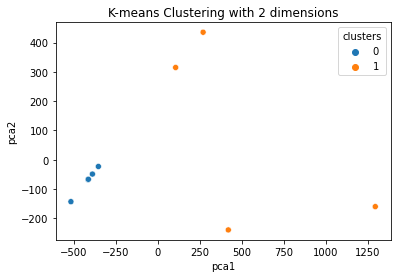

In [234]:
df = pd.read_csv('feature.csv')

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(df[['Anzahl Sakkaden', 'Gesamt Dauer Sakkaden', 'Anzahl Lost Tracks',
                                      'Dauer Lost Tracks','Anzahl Fixationen','Gesamt Dauer Fixationen']])

df['clusters'] = y

print(df)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df[['Anzahl Sakkaden', 'Gesamt Dauer Sakkaden', 'Anzahl Lost Tracks',
                                      'Dauer Lost Tracks','Anzahl Fixationen','Gesamt Dauer Fixationen']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [3]:
test = print('name' + str(1) + str(2))
test

name12


In [159]:
feat(8,13)
feat(98,103)
feat(202,207)
feat(262,267)
feat(325,330)

The file has been deleted successfully
    Szene  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0  8 - 13                    5.0             17.0                  950.0   

   Anzahl Lost Tracks  Dauer Lost Tracks  Anzahl Fixationen  \
0                 0.0                0.0               12.0   

   Gesamt Dauer Fixationen  
0                     4.05  
Merle_0.csv
    Szene  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0  8 - 13                    5.0             17.0                  950.0   
1  8 - 13                    5.0              5.0                  160.0   

   Anzahl Lost Tracks  Dauer Lost Tracks  Anzahl Fixationen  \
0                 0.0                0.0               12.0   
1                 7.0              221.0                4.0   

   Gesamt Dauer Fixationen  
0                    4.050  
1                    4.619  
Lena_28.06.22.csv
    Szene  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0  8 - 13  

In [160]:
if os.path.exists('features/feature_final.csv'):
    os.remove('features/feature_final.csv')
    print("The file has been deleted successfully")
else:
    print("The file does not exist!")
directory = 'features/'
df_final = pd.DataFrame({'Szene': [],'Cliplänge in Sekunden': [], 'Anzahl Sakkaden': [], 'Gesamt Dauer Sakkaden': [],"Anzahl Lost Tracks": [], "Dauer Lost Tracks": [], "Anzahl Fixationen": [],"Gesamt Dauer Fixationen": []})
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and not filename.startswith('.'):
        df = pd.read_csv(f, sep=",")
        df_final = pd.concat([df_final,df], ignore_index=True).drop(columns='Unnamed: 0')
        print(df_final)
        print(filename)
        df_final = df_final.loc[(df_final['Anzahl Fixationen'] >= 0 ) == True]
        df_final.to_csv('features/feature_final2.csv')

The file has been deleted successfully
        Szene  Cliplänge in Sekunden  Anzahl Sakkaden  Gesamt Dauer Sakkaden  \
0   325 - 330                    5.0              0.0                    0.0   
1   325 - 330                    5.0              1.0                   32.0   
2   325 - 330                    5.0              1.0                   31.0   
3   325 - 330                    5.0              0.0                    0.0   
4   325 - 330                    5.0              0.0                    0.0   
5   325 - 330                    5.0             13.0                  524.0   
6   325 - 330                    5.0              1.0                   31.0   
7   325 - 330                    5.0             12.0                  376.0   
8   325 - 330                    5.0             16.0                  502.0   
9   325 - 330                    5.0              7.0                  141.0   
10  325 - 330                    5.0             11.0                  346.0   
1

In [168]:
df_feat = pd.read_csv('feature_final2_test.csv')
df_feat = df_feat.sort_values('Label')
#df_feat.to_csv('train/train.csv')
df_feat.iloc[:5].to_csv('test/test_0.csv')
df_feat.iloc[56:61].to_csv('test/test_1.csv')
df_feat.iloc[5:60].to_csv('train/train.csv')

In [154]:
df_feat.iloc[1:60]

,Szene,Cliplänge in Sekunden,Anzahl Sakkaden,Gesamt Dauer Sakkaden,Anzahl Lost Tracks,Dauer Lost Tracks,Anzahl Fixationen,Gesamt Dauer Fixationen,Name,Label
29,98 - 103,5.0,7.0,279.0,0.0,0.0,9.0,4.721,Willi_0.csv,0
59,8 - 13,5.0,0.0,0.0,0.0,0.0,2.0,5.000,Annika_1.csv,0
31,98 - 103,5.0,5.0,235.0,0.0,0.0,6.0,4.765,Nils_21.06.csv,0
36,98 - 103,5.0,3.0,60.0,0.0,0.0,9.0,4.940,Jannis_0.csv,0
39,98 - 103,5.0,19.0,720.0,0.0,0.0,15.0,4.280,Vanessa_1.csv,0
40,98 - 103,5.0,20.0,627.0,0.0,0.0,15.0,4.373,Robin_0.csv,0
41,98 - 103,5.0,13.0,557.0,0.0,0.0,11.0,4.443,Celina_1.csv,0
42,98 - 103,5.0,8.0,264.0,0.0,0.0,7.0,4.736,Annika_1.csv,0
43,98 - 103,5.0,2.0,62.0,0.0,0.0,2.0,4.938,Ole_1.csv,0
45,8 - 13,5.0,5.0,160.0,1.0,221.0,4.0,4.619,Lena_28.06.22.csv,0


In [132]:

# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

TypeError: '((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),), 0)' is an invalid key

In [140]:
# define dataset
df = pd.read_csv('train/train.csv')
X = df[['Anzahl Sakkaden', 'Gesamt Dauer Sakkaden', 'Anzahl Lost Tracks','Dauer Lost Tracks','Anzahl Fixationen','Gesamt Dauer Fixationen']]
# define the model
model = DBSCAN()
# fit model and predict clusters
yhat = model.fit_predict(X)
yhat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [138]:
df = pd.read_csv('train/train.csv')
df['Anzahl Lost Tracks'].replace(0, np.nan, inplace=True)

In [139]:
df

,Unnamed: 0,Szene,Cliplänge in Sekunden,Anzahl Sakkaden,Gesamt Dauer Sakkaden,Anzahl Lost Tracks,Dauer Lost Tracks,Anzahl Fixationen,Gesamt Dauer Fixationen,Name,Label
0,0,325 - 330,5.0,1.0,32.0,NaN,0.0,2.0,4.968,Lena_28.06.22.csv,0
1,1,325 - 330,5.0,1.0,31.0,NaN,0.0,2.0,4.969,Willi_0.csv,0
2,2,325 - 330,5.0,12.0,524.0,NaN,0.0,10.0,4.476,Andy_1.csv,1
3,3,325 - 330,5.0,1.0,31.0,NaN,0.0,3.0,4.969,Timon_1.csv,0
4,4,325 - 330,5.0,10.0,376.0,NaN,0.0,7.0,4.624,Pia_27.06.2022.csv,0
...,...,...,...,...,...,...,...,...,...,...,...
56,56,8 - 13,5.0,5.0,218.0,NaN,0.0,5.0,4.782,Vanessa_1.csv,0
57,57,8 - 13,5.0,8.0,245.0,NaN,0.0,10.0,4.755,Robin_0.csv,0
58,58,8 - 13,5.0,6.0,340.0,NaN,0.0,6.0,4.660,Celina_1.csv,0
59,59,8 - 13,5.0,0.0,0.0,NaN,0.0,2.0,5.000,Annika_1.csv,0
